## AIM: To create functions which will render plots that can be made on a dynamic basis when the final script is ran. 

#### These plots can be done dynamically because the backend dataset required to create them is relatively small in size and therefore can be read and processed quickly based on user input.

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from math import pi
import math
import matplotlib.animation as manimation
import matplotlib.lines as mlines

NOTE: This notebook uses an external library called `Celluloid`.

It can be installed via `pip install celluloid`

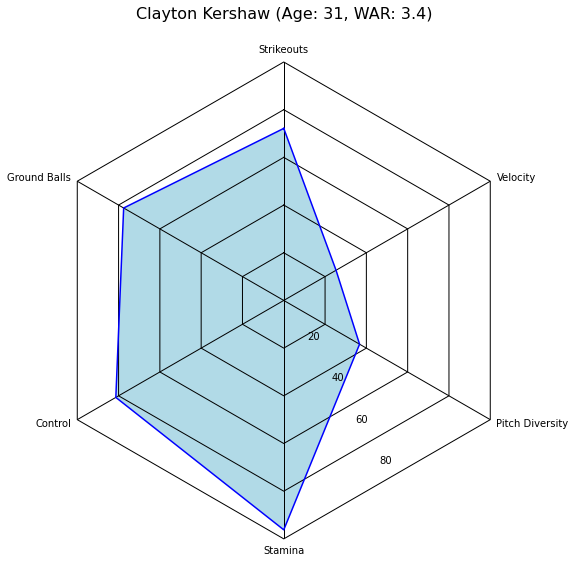

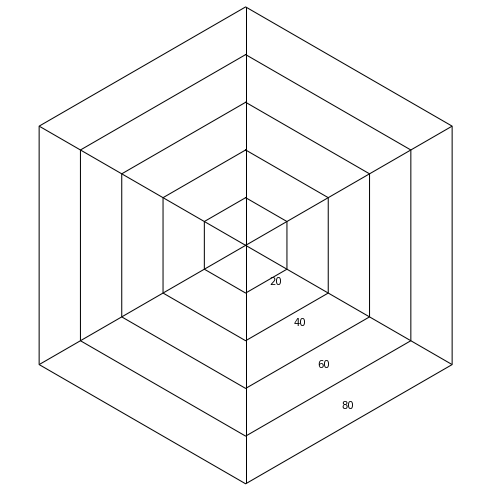

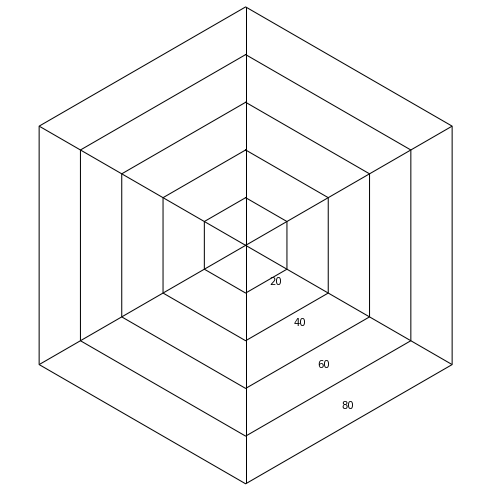

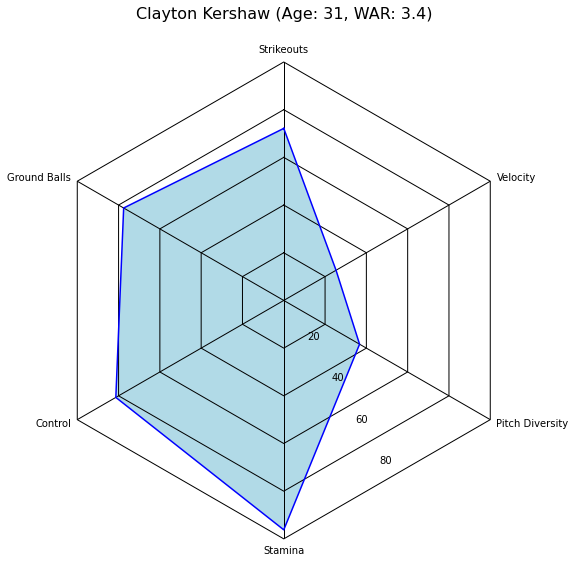

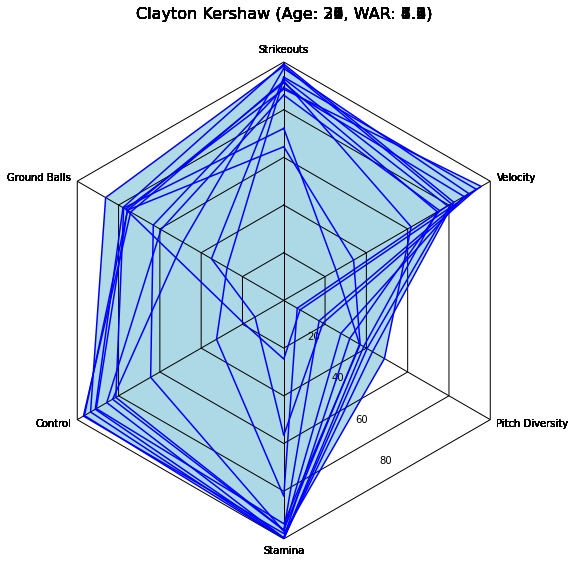

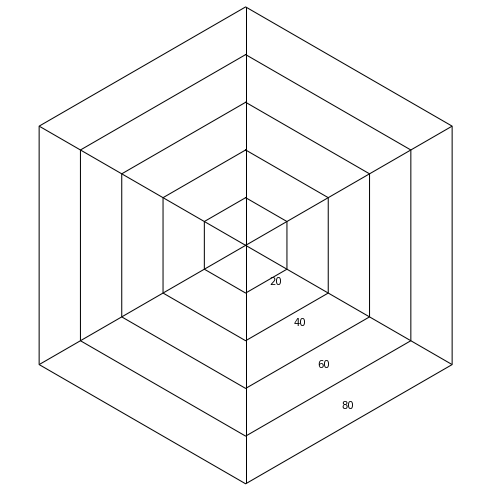

In [25]:
from celluloid import Camera

In [2]:
df = pd.read_csv('Master_df.csv',index_col = 0)

In [3]:
# Start with a dataframe for just one player to test things out
kershaw = df[df['Name'] == 'Clayton Kershaw']
# Sort to get chronological order of their career
kershaw.sort_values(by=['Age'], inplace = True)
kershaw.reset_index(drop = True, inplace = True)
kershaw

<ipython-input-3-6fe64d40f518>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kershaw.sort_values(by=['Age'], inplace = True)


,Season,Name,Team,W,L,G,GS,IP,K/9,BB/9,...,IP/G,Pitch Diversity,Shannon Diversity,Strikeouts,Control,Stamina,BA Against,Velocity,Ground Balls,performance
0,2008,Clayton Kershaw,Dodgers,5,5,21,21,106.2,8.44,4.30,...,5.06,7.894737,0.741097,88.596491,19.298246,24.561404,22.587719,95.614035,76.535088,312.500000
1,2009,Clayton Kershaw,Dodgers,8,8,30,30,169.0,9.64,4.79,...,5.63,18.987342,0.857889,93.670886,13.924051,56.540084,82.700422,93.248945,35.021097,311.392405
2,2010,Clayton Kershaw,Dodgers,13,10,32,32,204.1,9.34,3.57,...,6.38,6.511628,0.817068,93.023256,32.558140,82.093023,75.348837,79.302326,27.441860,320.930233
3,2011,Clayton Kershaw,Dodgers,21,5,33,33,233.1,9.57,2.08,...,7.06,17.117117,0.908630,97.297297,82.882883,96.396396,78.378378,89.639640,48.873874,432.207207
4,2012,Clayton Kershaw,Dodgers,14,9,33,33,227.2,9.05,2.49,...,6.88,27.659574,1.003240,89.361702,64.468085,96.808511,89.148936,87.234043,63.191489,428.723404
5,2013,Clayton Kershaw,Dodgers,16,9,33,33,236.0,8.85,1.98,...,7.15,31.932773,0.997065,86.134454,85.714286,99.579832,88.865546,75.420168,59.453782,438.235294
6,2014,Clayton Kershaw,Dodgers,21,3,27,27,198.1,10.85,1.41,...,7.34,40.343348,1.007612,98.283262,93.562232,100.000000,74.463519,81.115880,86.266094,499.570815
7,2015,Clayton Kershaw,Dodgers,16,7,33,33,232.2,11.64,1.62,...,7.04,42.978723,1.020312,99.148936,91.276596,99.574468,73.617021,82.340426,77.872340,493.191489
8,2016,Clayton Kershaw,Dodgers,12,4,21,21,149.0,10.39,0.66,...,7.10,38.695652,1.022466,91.304348,96.521739,100.000000,89.782609,74.347826,75.652174,476.521739
9,2017,Clayton Kershaw,Dodgers,18,4,27,27,175.0,10.39,1.54,...,6.48,48.756219,1.074752,92.039801,97.014925,97.761194,83.582090,61.691542,74.129353,471.393035


In [4]:
# Pick out the attributes I want to plot for a radar plot as well as some supporting columns such as name, and age
plotdf1 = kershaw[['Name', 'Strikeouts','Velocity','Pitch Diversity', 'Stamina', 'Control', 'Ground Balls',  'WAR', 'Age']]
plotdf1

,Name,Strikeouts,Velocity,Pitch Diversity,Stamina,Control,Ground Balls,WAR,Age
0,Clayton Kershaw,88.596491,95.614035,7.894737,24.561404,19.298246,76.535088,1.3,20
1,Clayton Kershaw,93.670886,93.248945,18.987342,56.540084,13.924051,35.021097,4.1,21
2,Clayton Kershaw,93.023256,79.302326,6.511628,82.093023,32.558140,27.441860,4.6,22
3,Clayton Kershaw,97.297297,89.639640,17.117117,96.396396,82.882883,48.873874,7.3,23
4,Clayton Kershaw,89.361702,87.234043,27.659574,96.808511,64.468085,63.191489,6.1,24
5,Clayton Kershaw,86.134454,75.420168,31.932773,99.579832,85.714286,59.453782,7.2,25
6,Clayton Kershaw,98.283262,81.115880,40.343348,100.000000,93.562232,86.266094,7.9,26
7,Clayton Kershaw,99.148936,82.340426,42.978723,99.574468,91.276596,77.872340,8.6,27
8,Clayton Kershaw,91.304348,74.347826,38.695652,100.000000,96.521739,75.652174,6.3,28
9,Clayton Kershaw,92.039801,61.691542,48.756219,97.761194,97.014925,74.129353,4.3,29


In [8]:
# Same code to make sure it works for another pitcher

# verlander = combined[combined['Name'] == 'Justin Verlander']
# verlander.sort_values(by=['Age'], inplace = True)
# verlander.reset_index(drop = True, inplace = True)
# display(verlander)

# plotdf = verlander[['Name', 'Strikeouts','Velocity', 'Control','Stamina/Consistency', 'BA Against', 'Ground Balls', 'WAR', 'Age']]
# display(plotdf)

In [10]:
# Originally wanted to also create a radar plot of pitch usage over the course of their career but decided against it
# Felt that it was unnecessary
'''
pitches = kershaw.loc[:,'FB%':'KN%']
pitches.dropna(axis = 1, thresh = int(len(pitches)*0.8), inplace = True)
pitches['Age'] = kershaw['Age']
pitches.fillna(0, inplace = True)
pitches
'''

,FB%,SL%,CB%,CH%,Age
0,71.3,0.0,23.1,5.6,20
1,71.9,6.8,16.9,4.4,21
2,71.6,19.6,7.0,1.8,22
3,65.3,25.5,5.4,3.8,23
4,62.0,23.1,11.3,3.7,24
5,60.7,24.5,12.5,2.4,25
6,55.4,29.4,14.3,0.9,26
7,53.9,27.5,18.2,0.4,27
8,50.7,33.3,15.6,0.4,28
9,47.1,34.9,16.8,1.2,29


In [5]:
# Define the function to create the radar plot
# Base code from: https://matplotlib.org/examples/api/radar_chart.html
# Modifications to make it a polygonal spine from: 
# https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python

# Create a function that will define the shape of a radar plot
def radar(num_vars, frame = 'circle'):
    '''
    num_vars = # of variables
    frame = shape of frame (default = circle)
    '''
    
    # create evenly spaced vertices starting at 0, ending at 2*pi (360deg) for 'num_vars' times
    theta = np.linspace(0, 2*np.pi, num = num_vars, endpoint = False)
    
    class RadarAxes(PolarAxes):
        # Instantiate that this is a radar plot
        name = 'radar'
        # variable # of args
        # kwags for variable keyworded argument list
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # set first axis @ 90 degrees (ie. at top)
            self.set_theta_zero_location('N')
        
        # Fill in the radar plot area
        def fill(self, *args, closed = True, **kwargs):
            # make line closed by default
            return super().fill(closed = closed, *args, **kwargs)
        
        # Draw out the radar plot outline
        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
                
        # Close the radar plot outline by adding the first point to the end so that it connects again
        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
                
        # add labels at their corresponding degrees        
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        # how to create frame
        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5 in axes coordinates
            # Allow the user to define the radar plot outer spine to either be circular or polygonal
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
        
        # This is the addition required to make the inner frames polygonal
        # Inner frames are circular by default from the matplotlib template code
        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)
            
        # 
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self, spine_type='circle', path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
                
    register_projection(RadarAxes)
    return theta

The code below has some requirements for it to run properly.

First, it needs the package `Celluloid`.

It can be easily installed via `pip install celluloid`.

It also needs the `FFMPEG` writer to render the animation inside of Jupyter Notebook. The writer is included in my submission.

In [24]:
# Looking to plot 6 traits, so set N (num variables/vertices) as 6
N = 6
# Get the 'X' coordinates in terms of radians, evenly divided in 6
x_as = [n / float(N) * 2 * pi for n in range(N)]

# Call the radar function using a polygonal spine, get returned the theta, or angles
theta = radar(N, frame = 'polygon')

# Set color of axes
plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")

# Specify path to ffmpeg writer, 
# **REQUIRED** for animation to run in the notebook
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg/bin/ffmpeg.exe'

# Create
ages = []
lines = []

# Create polar plot
fig, ax = plt.subplots(figsize=(8,8), sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
#ax = ax.flat
plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

# Set canvas colour
camera = Camera(fig)
# Loop through and plot a new full sized radar plot for each season
# Each season will overplot the previous one but Celluloid will clear the board and capture only the current one
for j in range(len(plotdf1)):
    # Set data
    x = np.array(plotdf1.columns[1:-2].values)
    y = np.array(pd.to_numeric(plotdf1.iloc[j,1:-2].values))
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Set position of radial-labels
    #ax.set_rticks([0, 20, 40, 60, 80, 100])
    ax.set_rlabel_position(150)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="black", linestyle='solid', linewidth=1)

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:], [])

    # Plot data
    line = plt.plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, y, 'lightblue', alpha=0.95)

    # Set axes limits
    plt.ylim(0, 100)    
    
    # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
    for i in range(N):
        # Calculate angles of the 6 vertices
        angle_rad = i / float(N) * 2 * pi
        # At top center
        if angle_rad == 0:
            ha, distance_ax = "center", 5
        # On right side
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        # On bottom
        elif angle_rad == pi:
            ha, distance_ax = "center", 5
        # On left side
        else:
            ha, distance_ax = "right", 3
        # Insert the text @ the angle position
        ax.text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
        
    # Add dynamic title that will have the age and WAR change with each frame
    # Celluloid can only have dynamic texts in this way, ax.set_title does not work and can't be dynamic
    ax.text(0.5, 1.1, f'{plotdf1.loc[j, "Name"]} (Age: {plotdf1.loc[j, "Age"]}, WAR: {plotdf1.loc[j, "WAR"]})', size = 16, 
            transform=ax.transAxes, horizontalalignment='center', verticalalignment="center")
    # Take a snapshot of every frame (ie. every iteration of the loop, corresponding to each year)
    camera.snap()

plt.tight_layout()     

# Code to get the animation to run inside Jupyter Notebook
from IPython.display import HTML
# Create the animation
anim = camera.animate()
# Write the animation as an HTML video and play in Jupyter
HTML(anim.to_html5_video())

# For actually saving to file, also adjust fps to make it slower
# animation = camera.animate()
# writer = manimation.PillowWriter(fps=0.5)
# animation.save(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/anim.gif', writer = writer)


The above animation works!

The code can easily be scaled and reproducible by setting a variable as the player name and running through the same process and saving them under different names using a f-string.

***

#### Here, I will also create a supporting function to ensure the above function will run in case of user input errors.

In [26]:
# Function to check if a name is in the master_df
def isin(name):
    if name not in list(df['Name']):
        return False
    else:
        return True

In [27]:
# Check if a real player is in the list
status = isin('Clayton Kershaw')
status

True

In [28]:
# Check that I am not a real baseball player
'Boyang' not in list(df['Name'])

True

***

In [12]:
# Peek into the column that shows their physical attribute sum (titled performance) over time
kershaw['performance']

0     335.087719
1     394.092827
2     396.279070
3     510.585586
4     517.872340
5     527.100840
6     574.034335
7     566.808511
8     566.304348
9     554.975124
10    469.364162
11    475.000000
Name: performance, dtype: float64

In [29]:
# Test out the workflow
# I wrote this all in one cell because I need to make sure they can all run sequentially without errors
# This is because I aim to turn this into a function down the line

# Pick a random player
name = df[df['Name'] == 'Zack Greinke']

# Start a dataframe containing just their ages
prog = pd.DataFrame(name['Age'])
# Add their performance and the season to that dataframe
# Set as copy so I don't overwrite the original if I do any operations
prog['performance'] = name['performance'].copy()
prog['season'] = name['Season'].copy()
# Reset index to be safe
prog.reset_index(drop = True, inplace = True)
prog

,Age,performance,season
0,20,369.026549,2004
1,21,298.026316,2005
2,23,304.545455,2007
3,24,449.122807,2008
4,25,473.417722,2009
5,26,448.372093,2010
6,27,448.423423,2011
7,28,479.787234,2012
8,29,423.319328,2013
9,30,462.446352,2014


The working dataframe creating looks good, but there is the slight problem of skipping the age 22 season.

The season is likely missing due to injuries or being sent to the minors but I don't have a gap in the data, I rather have it set to 0.

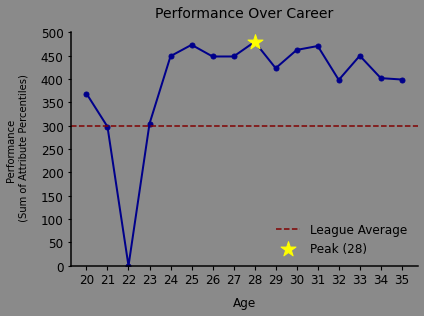

In [30]:
# Iterate over the dataframe
for i in range(len(prog)-1):
    # If the next row isn't the following year (ie. a year is missing)
    # Then add that year to the dataframe and set performance to 0
    if prog.loc[i, 'Age']+1 != prog.loc[i+1, 'Age']:
        new_row = pd.DataFrame([[prog.loc[i, 'Age']+1, 0]], columns = ['Age', 'performance'])
        prog = pd.concat([prog, new_row])

# Since the new row is concatenated at the bottom of the dataframe, the df will need to be resorted to be in chronological order
prog.sort_values(by='Age', inplace = True)
prog.reset_index(drop = True, inplace = True)

# Instantiate the figure
fig, ax = plt.subplots(figsize = (6, 4.5))
# Set background color to match web app
fig.patch.set_facecolor('#8a8a8a')
# Set face color too
ax.set_facecolor('#8a8a8a')

# Plot a star for where the peak of their performance is and annotate it
for i in range(len(prog)):
    # Check if the value is equal to the peak/max value of performance
    if prog.loc[i, 'performance'] == prog['performance'].max():
        ax.scatter(prog.loc[i, 'Age'], prog.loc[i, 'performance'], marker = '*',s = 250, color = 'yellow', 
                   label = f'Peak ({prog.loc[i, "Age"]})')
        
# Plot the line chart of performance over time        
ax.plot(prog['Age'], prog['performance'], linewidth = 2, marker = '.', markersize = 10, color = 'darkblue', zorder = 0)

# Formatting
plt.xticks(prog['Age'], prog['Age'])
plt.yticks(np.arange(0, round(prog['performance'].max(),-2)+1, 50))
# Removed/modified spines and ticks for aesthetics
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.1, labelsize = 12)
ax.yaxis.set_tick_params(width=1.1, labelsize = 12)

# Draw a horizontal line at 300 to represent the league average
# Since the performance is the sum of 6 percentile columns, the average percentile will always be 50
# Therefore the average performance will be 50*6 = 300
ax.axhline(y=300, linestyle = '--', c = 'maroon', label = 'League Average')

# Add labels
ax.set_ylabel('Performance \n (Sum of Attribute Percentiles)', fontsize = 10, labelpad = 12)
ax.set_xlabel('Age', fontsize = 12, labelpad = 10)
ax.set_title('Performance Over Career', fontsize = 14, pad = 15)
# Add a dynamic y-limit that will cater to the player
ax.set_ylim(0, round(prog['performance'].max(),-2))
# Legend
plt.legend(loc = 'lower right',fontsize = 12, edgecolor = 'none', facecolor = 'none')
plt.tight_layout()
#plt.savefig()
plt.show()

***
I now want to overplot their on field perfomance (measured in WAR, a baseball metric) to the above graph. This will allow for visualization of how their on field performance trends with their physical attributes over time.


In [32]:
# New player (make sure it works for different players)
player = df[df['Name'] == 'Justin Verlander']

# Same workflow as above but this time adding WAR
prog = pd.DataFrame(player['Age'])

prog['performance'] = player['performance'].copy()
prog['WAR'] = player['WAR'].copy()
prog['Season'] = player['Season'].copy()

prog.reset_index(drop = True, inplace = True)

# Check of any missing years due to injuries etc again
for i in range(len(prog)-1):
    if prog.loc[i, 'Age']+1 != prog.loc[i+1, 'Age']:
        new_row = pd.DataFrame([[prog.loc[i, 'Age']+1, 0, 0, prog.loc[i, 'Season']+1]], 
                               columns = ['Age', 'performance', 'WAR', 'Season'])
        prog = pd.concat([prog, new_row])
        
prog.sort_values(by='Age', ignore_index = True, inplace = True)

prog

,Age,performance,WAR,Season
0,22,293.640351,0.1,2005
1,23,358.686441,2.8,2006
2,24,402.892562,3.7,2007
3,25,339.035088,3.2,2008
4,26,424.261603,8.4,2009
5,27,436.744186,6.7,2010
6,28,471.846847,6.5,2011
7,29,462.978723,6.9,2012
8,30,397.478992,4.8,2013
9,31,353.004292,3.2,2014


In [33]:
# Get the average WAR for each season, for plotting the league average as a comparative metric
avg_war = pd.DataFrame(df.groupby(['Season']).mean()['WAR'])
avg_war

,WAR
Season,
2002,1.618500
2003,1.576959
2004,1.503097
2005,1.570614
2006,1.395339
2007,1.345868
2008,1.475000
2009,1.427848
2010,1.641395


In [301]:
# Do an inner join based on season since the player will likely not be around for every single season from 2002-2019
# Making sure to note the column names for the original (WAR_x) and the league average (WAR_y)
prog.merge(avg_war, on = 'Season', how = 'inner')

,Age,performance,WAR_x,Season,WAR_y
0,22,293.640351,0.1,2005,1.570614
1,23,358.686441,2.8,2006,1.395339
2,24,402.892562,3.7,2007,1.345868
3,25,339.035088,3.2,2008,1.475000
4,26,424.261603,8.4,2009,1.427848
5,27,436.744186,6.7,2010,1.641395
6,28,471.846847,6.5,2011,1.562162
7,29,462.978723,6.9,2012,1.361277
8,30,397.478992,4.8,2013,1.385294
9,31,353.004292,3.2,2014,1.432618


In [31]:
# Get the maximum WAR for each season, for the purpose of setting axis limits
pd.DataFrame(df.groupby(['Season']).max()['WAR'])

,WAR
Season,
2002,9.4
2003,7.8
2004,9.6
2005,7.1
2006,6.7
2007,6.7
2008,7.4
2009,8.7
2010,7.3


In [35]:
# Function to create a line plot of pitcher attribute progression over time
# Created by combining the above workflow
def progression(name):
    # Create the working dataframe
    player = df[df['Name'] == name]
    avg_war = pd.DataFrame(df.groupby(['Season']).mean()['WAR'])
    prog = pd.DataFrame(player['Age'])
    prog['performance'] = player['performance'].copy()
    prog['WAR'] = player['WAR'].copy()
    prog['Season'] = player['Season'].copy()
    prog.reset_index(drop = True, inplace = True)
    
    # Inserting any missing seasons
    for i in range(len(prog)-1):
        if prog.loc[i, 'Age']+1 != prog.loc[i+1, 'Age']:
            new_row = pd.DataFrame([[prog.loc[i, 'Age']+1, 0, 0, prog.loc[i, 'Season']+1]], 
                                   columns = ['Age', 'performance', 'WAR', 'Season'])
            prog = pd.concat([prog, new_row])

    # Merge in the average WAR        
    prog = prog.merge(avg_war, on = 'Season', how = 'inner')
    prog.sort_values(by='Age', inplace = True)
    prog.reset_index(drop = True, inplace = True)

    fig, ax = plt.subplots(figsize = (5.7, 5))
    # Add additional space to the bottom of the plot since I aim to add the legend down there
    plt.subplots_adjust(bottom = 0.4)
    # Set face and background colours
    fig.patch.set_facecolor('#8a8a8a')
    ax.set_facecolor('#8a8a8a')
    # Add ticks
    plt.xticks(prog['Age'], prog['Age'])
    # Plot the attributes
    ax.plot(prog['Age'], prog['performance'], linewidth = 2, marker = '.', markersize = 10, color = 'darkblue', zorder = 2, 
            label = 'Attributes') 
    
    # Aesthetic adjustments
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')  
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.1, labelsize = 12)
    ax.yaxis.set_tick_params(width=1.1, labelsize = 12)
    
    # Change color for the y-ticks and y-axis to colour code
    # Purpose is that I aim to create dual axes so I'll need to color code them
    ax.tick_params(axis='y', colors = 'darkblue')
    ax.spines['left'].set_color('darkblue')
    # Set reasonable axis limits
    ax.set_ylim(0, 600)
    ax.set_xlim(prog['Age'].min(), prog['Age'].max())
    # Set labels and titles
    ax.set_ylabel('Performance \n (Sum of Attribute Percentiles)', fontsize = 10, labelpad = 12, color = 'darkblue')
    ax.set_xlabel('Age', fontsize = 12, labelpad = 10)
    ax.set_title('Performance Over Career', fontsize = 14, pad = 15)
    
    # Add a star for the peak performance point
    for i in range(len(prog)):
        if prog.loc[i, 'performance'] == prog['performance'].max():
            att_peak = ax.scatter(prog.loc[i, 'Age'], prog.loc[i, 'performance'], marker = '*',s = 250, color = 'yellow',
                                  label = f'Attribute Peak ({prog.loc[i, "Age"]})', zorder = 10)
    # League average performance line
    ax.axhline(y=300, linestyle = '--', c = '#C7CEEA', label = 'League Attribute Average', zorder = 0)
    
    # Instatiate a second y-axis/plot that will share the x-axis as above
    ax2 = ax.twinx()
    # Set label and color for y-axis/y-ticks
    ax2.set_ylabel('WAR (Wins Above Replacement)', labelpad = 12, color = 'maroon')
    ax2.spines['right'].set_color('maroon')
    ax2.tick_params(axis='y', colors='maroon')
    ax2.yaxis.set_tick_params(width=1.1, labelsize = 12)
    
    # Set y limits, set max to 10 because no player has WAR over 10
    # Use if statement so the axis can either start at 0, but if player has negative WAR seasons then it has to start at negative number
    if prog['WAR_x'].min() >= 0:
        ax2.set_ylim(0, 10)
        ax2.set_yticks(np.arange(0, 11, 2))
    else:
        ax2.set_ylim(math.floor(prog['WAR_x'].min()), 10)
        ax2.set_yticks(np.arange(math.floor(prog['WAR_x'].min()), 11, 2))

    # Aesthetic adjustments, this time removing the left spines since this is occupying the right spine
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_linewidth(1.5)
    # Plot the player WAR over time
    ax2.plot(prog['Age'], prog['WAR_x'], marker = '.', markersize = 10, color = 'maroon', label = 'WAR', zorder = 1)
    # Plot the league average WAR over time
    ax2.plot(prog['Age'], prog['WAR_y'], color = '#FF6961', label = 'League WAR Average', linestyle = '--', zorder = 0)
    # Add a different coloured star for peak WAR
    for i in range(len(prog)):
        if prog.loc[i, 'WAR_x'] == prog['WAR_x'].max():
            war_peak = ax2.scatter(prog.loc[i, 'Age'], prog.loc[i, 'WAR_x'], marker = '*', s = 200, 
                                   color = 'orange', label = f'WAR Peak ({prog.loc[i, "Age"]})', zorder = 10)  
            
    # Create proxy-lines for the purpose of creating a legend, matching lines plotted above
    # This way allows greater customization of the legend order
    att = mlines.Line2D([], [], linewidth = 2, marker = '.', markersize = 10, color = 'darkblue', label = 'Attributes')
    war = mlines.Line2D([], [], marker = '.', markersize = 10, color = 'maroon', label = 'WAR')
    att_avg = mlines.Line2D([], [], linestyle = '--', c = '#C7CEEA', label = 'League Attribute Average',)
    war_avg = mlines.Line2D([], [], color = '#FF6961', label = 'League WAR Average', linestyle = '--',)
    
    # Add the figure legend in specific order
    fig.legend(handles=[att, war, att_avg, war_avg, att_peak, war_peak], 
               fontsize = 10, edgecolor = 'none', facecolor = 'none', bbox_to_anchor=(1, 0.18), ncol = 3)
    
    # Save as a relative path
    # filename = cwd + f'/static/plots/prog{now}.png'
    # Save and add in facecolor argument otherwise the background color won't be saved
    # Saved with a dynamic file name because Flask has bad habit of caching objects in the Static folder, meaning they don't update if overwritten
    # plt.savefig(filename, facecolor=fig.get_facecolor(), bbox_inches='tight')
    plt.show()

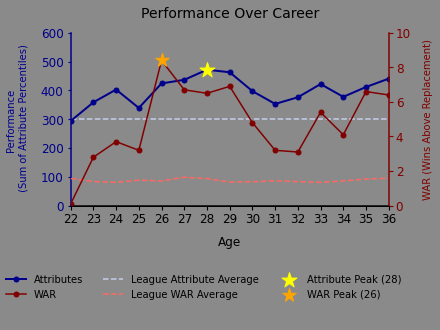

In [36]:
# Test run of the function
progression('Justin Verlander')

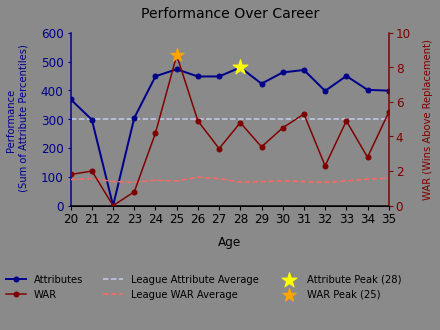

In [37]:
# Test run of the function
progression('Zack Greinke')

Looks like this function works and is scalable to any player!

***

### Next to create a static radar plot showing their career average attributes

In [38]:
# Group by name and get the means of all the columns -> get career averages for each player
agg = df.groupby(['Name']).mean()
# Filter down to only their percentile attributes
agg = agg.loc[:, 'Pitch Diversity':'performance']
# Get only the desired attributes
agg.drop(['Shannon Diversity', 'BA Against', 'performance'], axis = 1, inplace = True)
# Filter out a specific player
player = agg[agg.index == 'Clayton Kershaw']
# Make sure it works
player.values[0]

array([29.54834948, 88.78859991, 70.77514504, 86.92992186, 73.25719287,
       64.80761174])

In [39]:
# Create the static plot showing a pitcher's average career attributes
# Creation of this radar plot is identical to the animated one, except there is no iterating and creating multiple over-plots
# And does not require the Celluloid package to capture and animate
def static(name):
    agg = df.groupby(['Name']).mean()
    agg = agg[['Strikeouts','Velocity','Pitch Diversity', 'Control', 'Stamina', 'Ground Balls']]
    player = agg[agg.index == name]

    N = 6

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    theta = radar(N, frame = 'polygon')
    
    # Set color of axes
    plt.rc('axes', linewidth=1.5, edgecolor="black", facecolor = "lightgrey")

    # Create polar plot
    fig, ax = plt.subplots(figsize=(4.5,4.5), sharex = True, sharey= True, subplot_kw = dict(projection='radar'))

    # Set axis limits
    plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

    # Set canvas colour
    fig.patch.set_facecolor('#8a8a8a94')

    # Set data
    x = np.array(player.columns.values)
    y = np.array(player.values[0])
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

    # Set position of radial-labels
    #ax.set_rticks([0, 20, 40, 60, 80, 100])
    ax.set_rlabel_position(155)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:], [])


    ax.plot(x_as, y, linewidth=2, color = 'b', linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, y, 'skyblue', alpha = 0.7, zorder = 20)

    # Set axes limits
    plt.ylim(0, 100)
    #plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])

    # Add title
    ax.set_title(f'{name} Career Attributes', position=(0.5, 1.1), size = 14, 
                 horizontalalignment='center', verticalalignment='center')

    # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
    for i in range(N):
        # Calculate angles of the 6 vertices
        angle_rad = i / float(N) * 2 * pi
        # At top center
        if angle_rad == 0:
            ha, distance_ax = "center", 5.7
        # On right side
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        # On bottom
        elif angle_rad == pi:
            ha, distance_ax = "center", 5.7
        # On left side
        else:
            ha, distance_ax = "right", 3
        # Insert the text @ the angle position
        ax.text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
        
    plt.tight_layout()
    #plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/plot{now}.png')
    plt.show()

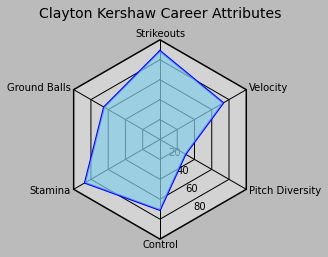

In [40]:
# Test out the function
static('Clayton Kershaw')

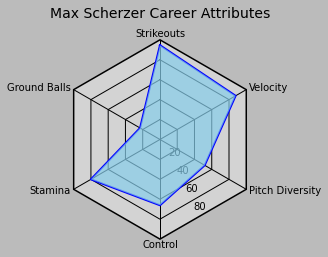

In [41]:
# Test again
static('Max Scherzer')

### Here I now have 3 functions that are scalable to any pitcher of interest that can be deployed to create the desired plot objects dynamically, depending on the user input!

In summary, I can create:

1. A dynamic radar plot showing the attributes changing over time.
2. A line plot showing the trend of the player's total attributes and their on field performance over time
3. A static radar plot showing their overall career average attributes.

***

In [ ]:
# This code was meant to create multiple radar subplots for every season of a pitcher's career
# Elected not to use it, would have been way too cluttered, elected for the above single career average plot instead

'''
def static(name, now):

    kershaw = df[df['Name'] == name]
    kershaw.sort_values(by=['Age'], inplace = True)
    kershaw.reset_index(drop = True, inplace = True)

    plotdf1 = kershaw[['Name', 'Strikeouts','Velocity','Pitch Diversity', 'Control', 'Stamina','Ground Balls',  'WAR', 'Age']]
    plotdf1.sort_values(by=['Age'], inplace = True)
    plotdf1.reset_index(drop=True, inplace=True)


    N = 6

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    theta = radar(N, frame = 'polygon')

    # Set color of axes
    plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")

    cols = 3
    rows = (len(plotdf1)//3 + ((len(plotdf1)%3)//3)+1)

    # Create polar plot
    fig, ax = plt.subplots(rows, cols, figsize=(14.5, 16),
                        sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
    ax = ax.flat


    # Set canvas colour
    #fig.patch.set_facecolor('xkcd:mint green')
    for j in range(len(plotdf1)):
        # Set data
        x = np.array(plotdf1.columns[1:-2].values)
        y = np.array(pd.to_numeric(plotdf1.iloc[j,1:-2].values))
        # Set clockwise rotation. That is:
        ax[j].set_theta_offset(pi / 2)
        ax[j].set_theta_direction(-1)
        plt.setp(ax[j], yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

        # Set position of radial-labels
        #ax.set_rticks([0, 20, 40, 60, 80, 100])
        ax[j].set_rlabel_position(150)


        # Set color and linestyle of grid
        ax[j].xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
        ax[j].yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


        # Set number of radial axes and remove labels
        plt.xticks(x_as[:], [])


        ax[j].plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)
        # Fill area
        ax[j].fill(x_as, y, 'skyblue', alpha=0.95)

        # Set axes limits
        plt.ylim(0, 100)
        #plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])
        
        # Add title
        ax[j].set_title(f'Age: {plotdf1.loc[j, "Age"]}, WAR: {plotdf1.loc[j, "WAR"]}', 
                        position=(0.5, 1.1), 
                        size = 14, horizontalalignment='center', verticalalignment='center')
        
        # Adjust positioning of vertex labels based on their position from 0 - 2pi (circle)
        for i in range(N):
            # Calculate angles of the 6 vertices
            angle_rad = i / float(N) * 2 * pi
            # At top center
            if angle_rad == 0:
                ha, distance_ax = "center", 5.7
            # On right side
            elif 0 < angle_rad < pi:
                ha, distance_ax = "left", 3
            # On bottom
            elif angle_rad == pi:
                ha, distance_ax = "center", 5.7
            # On left side
            else:
                ha, distance_ax = "right", 3
            # Insert the text @ the angle position
            ax[j].text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
        
    # Remove any extra empty subplots
    remainders = (rows*cols) - len(plotdf1)
    if remainders > 0:
        for n in np.arange(1, remainders+1):
            fig.delaxes(ax[-n])
        
    #plt.tight_layout()
    plt.subplots_adjust(wspace = 0.6, hspace=0.4)
    plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/plot{now}.png')


'''